# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
**NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!**
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2008 to Jan 1st 2019 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,30.570000,29.750000,30.090000,30.190001,12947700.0,21.783510
2008-01-02,30.480000,28.980000,30.480000,29.100000,24387800.0,20.997015
2008-01-03,29.370001,28.170000,29.250000,28.520000,26313100.0,20.578518
2008-01-04,28.320000,26.990000,28.250000,27.490000,50818700.0,19.835321
2008-01-07,28.040001,27.110001,27.700001,27.680000,25887100.0,19.972424


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stock_data = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

**Set the column name levels (this is filled out for you):**

In [8]:
bank_stock_data.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [9]:
bank_stock_data.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2007-12-31   41.599998  40.610001  40.910000  41.259998  24663300.0   
2008-01-02   41.549999  40.349998  41.529999  40.560001  30764600.0   
2008-01-03   40.810001  40.250000  40.630001  40.299999  22589500.0   
2008-01-04   40.290001  39.759998  40.000000  39.849998  34921700.0   
2008-01-07   40.240002  39.259998  40.049999  39.900002  31884400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2007-12-31   34.116703  296.899994  288.000000  291.399994  294.399994  ...   
2008-01-02   33.537910  298.899994  288.500000  297.299988  289.200012  ...   
2008-01-03   33.322918  293.899994  288.899994  292.200012  289.299988  ...   
2008-01-04   32.950821  290.299988  280.399994  286.100006  282.399994  ...   
2008-01-07   32.992176  287.600006  279.299988  283.399994  282.600006  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2007-12-31   53.000000  53.110001   8019200.0  43.018036  30.570000   
2008-01-02   52.980000  50.950001  17624100.0  41.268475  30.480000   
2008-01-03   51.209999  50.939999  11422200.0  41.260372  29.370001   
2008-01-04   49.919998  49.299999  14448500.0  39.932003  28.320000   
2008-01-07   49.500000  48.310001  18767500.0  39.130123  28.040001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2007-12-31   29.750000  30.090000  30.190001  12947700.0  21.783510  
2008-01-02   28.980000  30.480000  29.100000  24387800.0  20.997015  
2008-01-03   28.170000  29.250000  28.520000  26313100.0  20.578518  
2008-01-04   26.990000  28.250000  27.490000  50818700.0  19.835321  
2008-01-07   27.110001  27.700001  27.680000  25887100.0  19.972424  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stock_data.xs(key='Close',axis=1,level="Stock Info").max()

Bank Ticker
BAC     45.029999
C      296.899994
GS     273.380005
JPM    118.769997
MS      58.910000
WFC     65.930000
dtype: float64

**Create a new empty DataFrame called returns.**



In [11]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tk in tickers:
    returns[tk+" returns"] = bank_stock_data[tk]["Close"].pct_change()

In [13]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2007-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,-0.016966,-0.017663,-0.034643,-0.033906,-0.040670,-0.036105
2008-01-03,-0.006410,0.000346,-0.013295,-0.006877,-0.000196,-0.019931
2008-01-04,-0.011166,-0.023851,-0.023970,-0.022684,-0.032195,-0.036115
2008-01-07,0.001255,0.000708,-0.026009,0.010017,-0.020081,0.006912


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


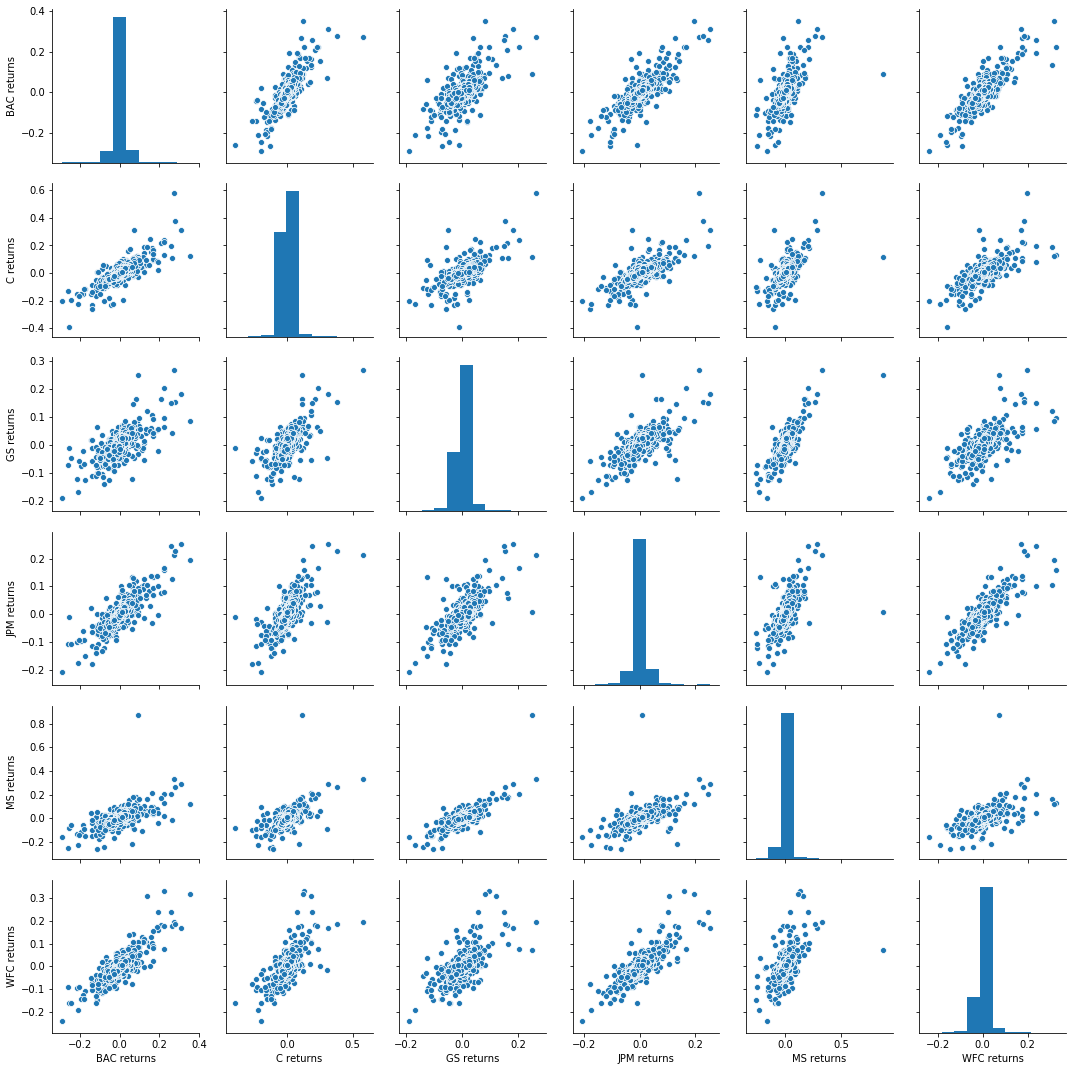

In [14]:
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
# Worst drop
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

* See Solution for details

In [16]:
# Best Gain
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [17]:
returns.std()

BAC returns    0.035680
C returns      0.037272
GS returns     0.024216
JPM returns    0.026618
MS returns     0.036191
WFC returns    0.029164
dtype: float64

Citigroup is the riskiest

In [18]:
returns.loc["2015-01-01":"2015-12-31"].std()

BAC returns    0.016163
C returns      0.015289
GS returns     0.014046
JPM returns    0.014017
MS returns     0.016249
WFC returns    0.012591
dtype: float64

The risk are very similiar for all. Among them Morgan Stanly and Bank of america are riskiest.


**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

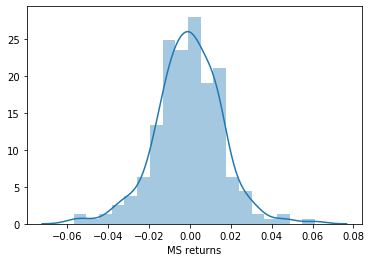

In [19]:
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["MS returns"])

**Create a distplot using seaborn of the 2015 returns for Bank Of America**

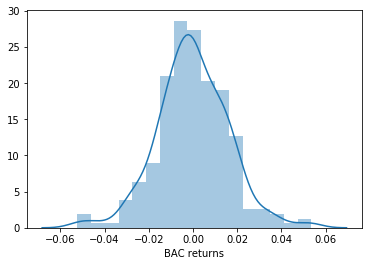

In [20]:
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["BAC returns"])

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

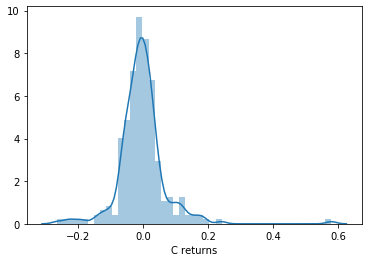

In [22]:
sns.distplot(returns.loc["2008-01-01":"2008-12-31"]["C returns"])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [23]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [24]:
bank_stock_data.xs(key='Close',axis=1,level="Stock Info").iplot()

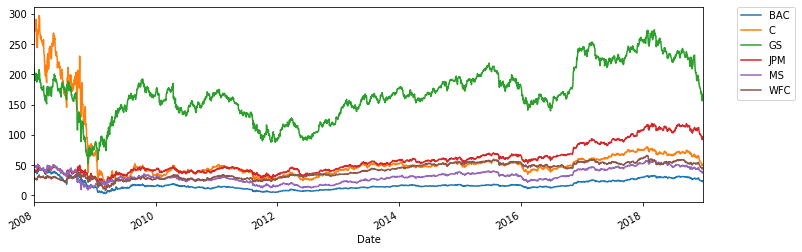

In [25]:
for tick in tickers:
    bank_stock_data[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

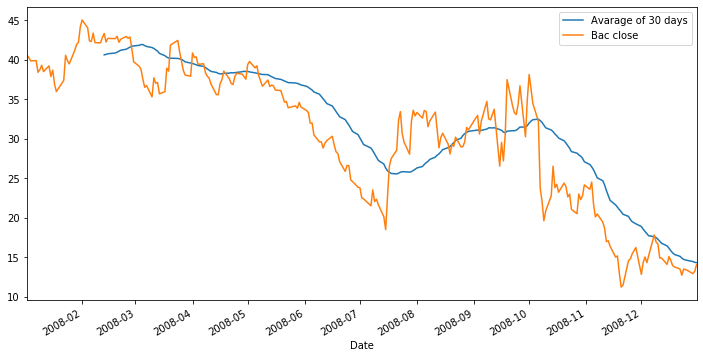

In [26]:
plt.figure(figsize=(12,6))
BAC["Close"].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label="Avarage of 30 days")
BAC["Close"].loc['2008-01-01':'2009-01-01'].plot(label="Bac close")
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

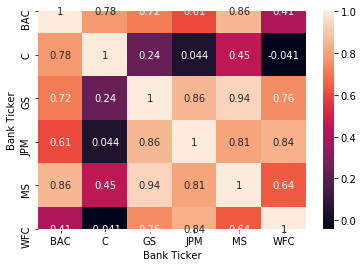

In [27]:
# Heat map using seaborn
sns.heatmap(bank_stock_data.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [28]:
# heat map using plotty
bank_stock_data.xs(key='Close',axis=1,level='Stock Info').corr().iplot(kind='heatmap')

**Use seaborn's clustermap to cluster the correlations together:**

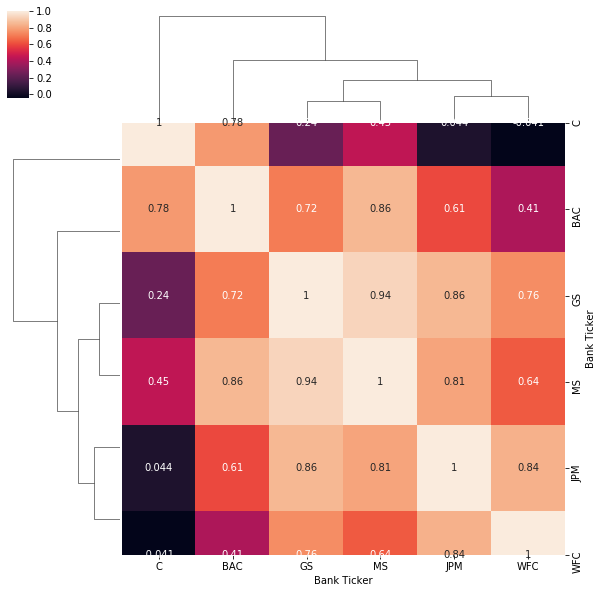

In [29]:
sns.clustermap(bank_stock_data.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [31]:
BAC[["Open","High","Low","Close"]].loc["2015-01-01":"2016-01-01"].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [32]:
MS["Close"].loc["2015-01-01":"2015-12-31"].ta_plot(study="sma",title="Simple moving Avg")

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [33]:
BAC["Close"].loc["2015-01-01":"2015-12-31"].ta_plot(study="boll")